# TRABAJO SEMANAL 11

> ## Alumno: Fabrizio Hermosa
> ## Materia: Teoría de los circuitos II
> ## Curso: R4001

## <u> Consignas y desarrollo </u>  ##

In [1]:
from IPython.display import IFrame
IFrame("./TS11_TC2_R4001-FabrizioHermosa.pdf", width=900, height=1000)

## <u> Simulaciones numéricas y circuitales </u> ##

Para el **ejercicio 1** se comprueban los valores de los componentes calculados analíticamente mediante **simulación numérica**.

In [2]:
#Importo librerias de la catedra
import sympy as sp

from pytc2.sintesis_dipolo import cauer_RC, foster, foster_zRC2yRC
from pytc2.dibujar import display, dibujar_puerto_entrada, dibujar_puerto_salida, dibujar_funcion_exc_abajo, dibujar_elemento_serie, dibujar_elemento_derivacion, dibujar_tanque_RC_derivacion, dibujar_espacio_derivacion, Capacitor, Inductor, Resistor, ResistorIEC
from pytc2.remociones import remover_polo_dc, remover_polo_jw, remover_valor_en_dc, remover_valor_en_infinito, remover_polo_sigma
from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s
from IPython.display import display, Markdown

s = sp.symbols('s', complex=True)

In [3]:
# Función de excitación (síntesis no disipativa)

Y11 = (3*s*(s**2 + 7/3))/((s**2 + 2)*(s**2 + 5))
Y11 = sp.nsimplify(Y11)

print_latex(a_equal_b_latex_s('Y_{11}(s)', Y11))


<IPython.core.display.Math object>

In [4]:
# Remoción parcial de polo en DC 

Z2, Z1 = remover_polo_dc(1/Y11, omega_zero = 1)

print_latex(a_equal_b_latex_s('Z_1(s)', Z1))
print_latex(a_equal_b_latex_s('Z_2(s)', Z2))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [5]:
# Remoción total polo en jw = 1

Y4, k0, L1, C2 = remover_polo_jw(1/Z2, omega = 1, isImpedance = False)

print_latex(a_equal_b_latex_s('k_0', k0))
print_latex(a_equal_b_latex_s('Y_4(s)', Y4))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [6]:
Z6, Z5 = remover_polo_dc(1/Y4)

print_latex(a_equal_b_latex_s('Z_5(s)', Z5))
print_latex(a_equal_b_latex_s('Z_6(s)', Z6))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

**Simulación circuital** para comprobar los polos y ceros de las funciones de excitación dadas.

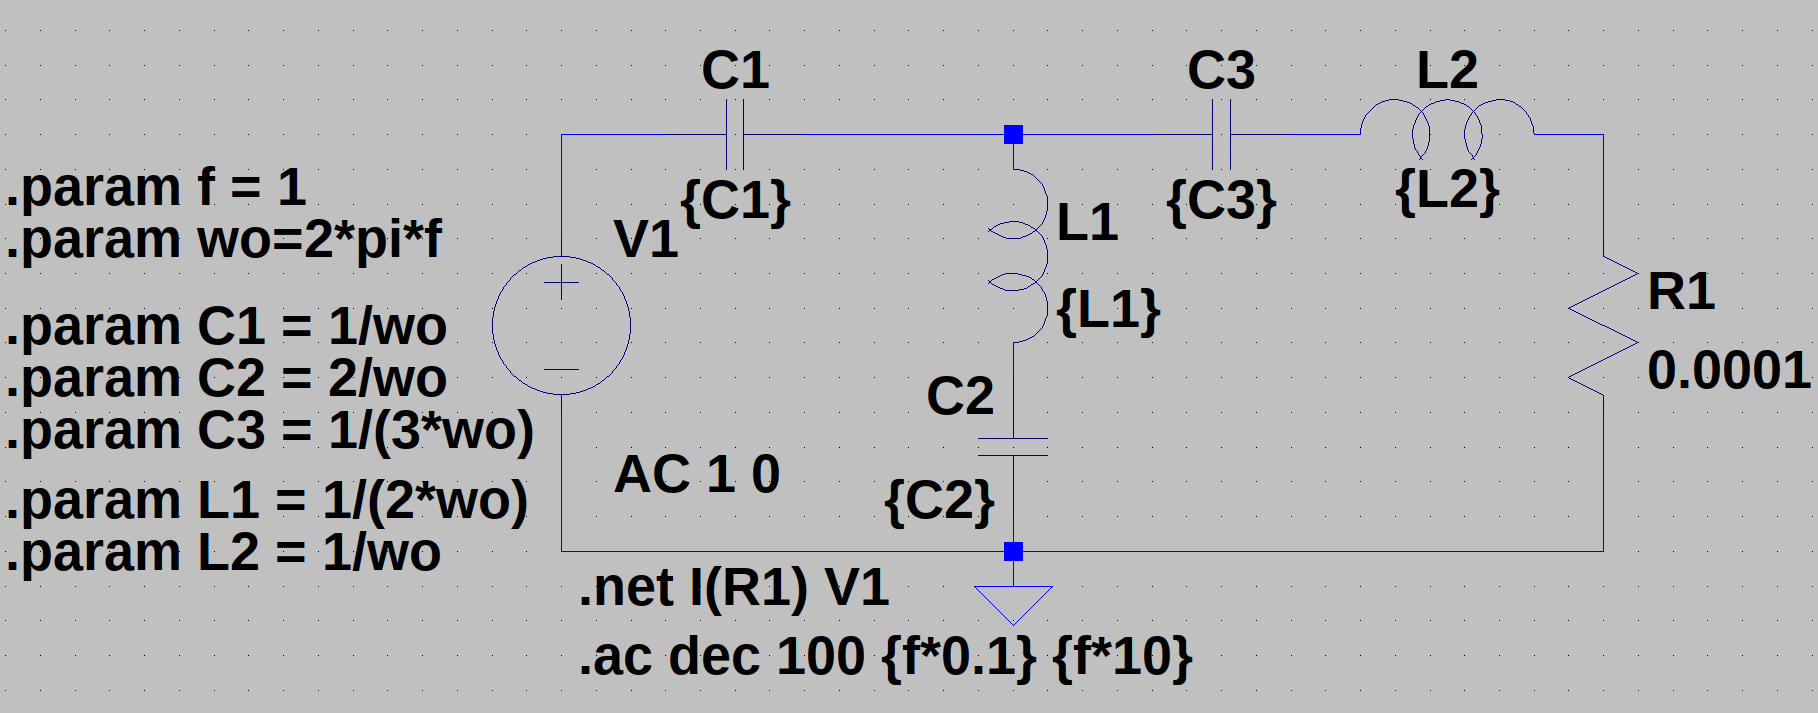

R1 se colocó para poder simular.

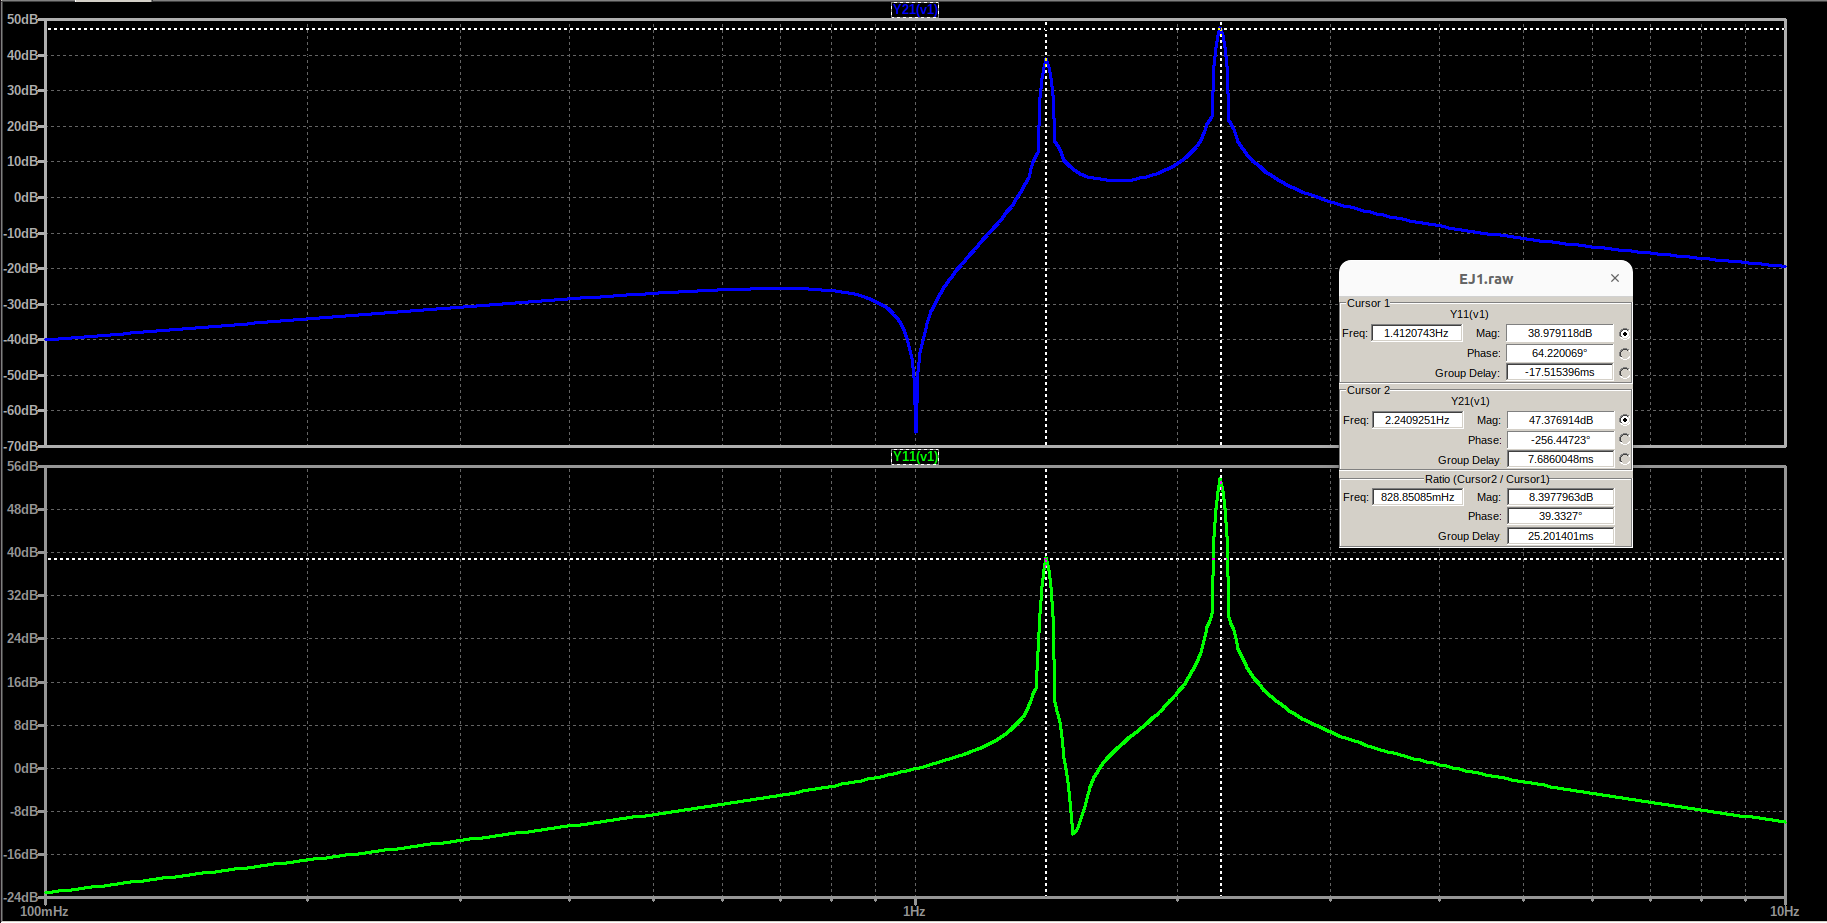



Los polos y ceros de ambas funciones de excitación coinciden con los de sus expresiones matemáticas.

Para el **ejercicio 2** se procedió con lo mismo. Primero la **simulación numérica**.

Por parámetros Z:

In [7]:
# Función de excitación (síntesis disipativa) verificación matricial
from pytc2.cuadripolos import Z2Tabcd_s, Y2Tabcd_s, Tabcd2Z_s, Tabcd2Y_s

R1 = 1
R2 = 1/4
C1 = 2/5
C2 = 4
C3 = 2

Z1 = R1 + 1/(s*C1)
Y2 = 1/(1/4 + 1/(s*C2))
Y3 = s*C3

Z1 = sp.nsimplify(Z1)
Y2 = sp.nsimplify(Y2)
Y3 = sp.nsimplify(Y3)

print_latex(a_equal_b_latex_s('Z_1(s)', Z1))
print_latex(a_equal_b_latex_s('Y_2(s)', Y2))
print_latex(a_equal_b_latex_s('Y_3(s)', Y3))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [8]:
TZ1 = sp.Matrix([
                    [1, Z1],
                    [0, 1]
                ])

TY2 = sp.Matrix([
                    [1, 0],
                    [Y2, 1]
                ])

TY3 = sp.Matrix([
                    [1, 0],
                    [Y3, 1]
                ])

T = TZ1*TY2*TY3

T=sp.expand(T)
T=sp.nsimplify(T)
T=sp.expand(T)

print_latex(a_equal_b_latex_s('T', T))

<IPython.core.display.Math object>

In [9]:
A = T[0,0]

Ts = sp.factor(1/A)

print_latex(a_equal_b_latex_s('T(s)', Ts))

<IPython.core.display.Math object>

Se deduce $k = 1/2$.

Por parámetros Y:

In [10]:
R1 = 2/5
R2 = 4
C1 = 1
C2 = 1/4
R3 = 2

Z1 = R3 + 1/(1/R2 + s*C2)
Y2 = 5/2
Y3 = s

Z1 = sp.nsimplify(Z1)
Y2 = sp.nsimplify(Y2)
Y3 = sp.nsimplify(Y3)

print_latex(a_equal_b_latex_s('Z_1(s)', Z1))
print_latex(a_equal_b_latex_s('Y_2(s)', Y2))
print_latex(a_equal_b_latex_s('Y_3(s)', Y3))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [11]:
TZ1 = sp.Matrix([
                    [1, Z1],
                    [0, 1]
                ])

TY2 = sp.Matrix([
                    [1, 0],
                    [Y2, 1]
                ])

TY3 = sp.Matrix([
                    [1, 0],
                    [Y3, 1]
                ])

T = TZ1*TY2*TY3

T=sp.expand(T)
T=sp.nsimplify(T)
T=sp.expand(T)

print_latex(a_equal_b_latex_s('T', T))

<IPython.core.display.Math object>

In [12]:
A = T[0,0]

Ts = sp.factor(1/A)

print_latex(a_equal_b_latex_s('T(s)', Ts))

<IPython.core.display.Math object>

Se deduce $k = -1/2$.

Con la **simulación circuital** se busca que la forma de la respuesta en frecuencia corresponda con la transferencia.

Parámetros Z:

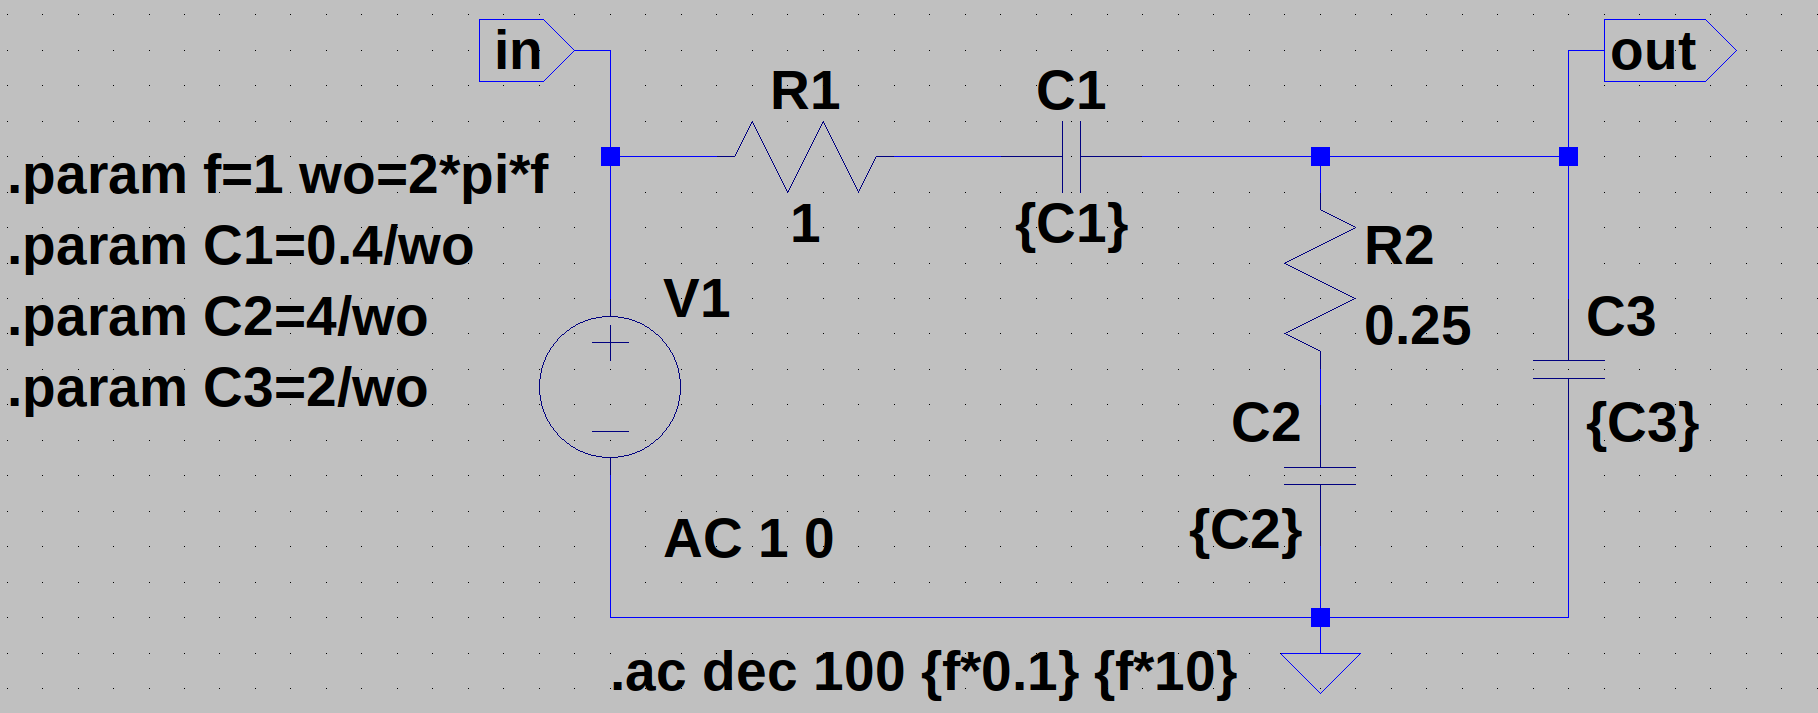

Parámetros Y:

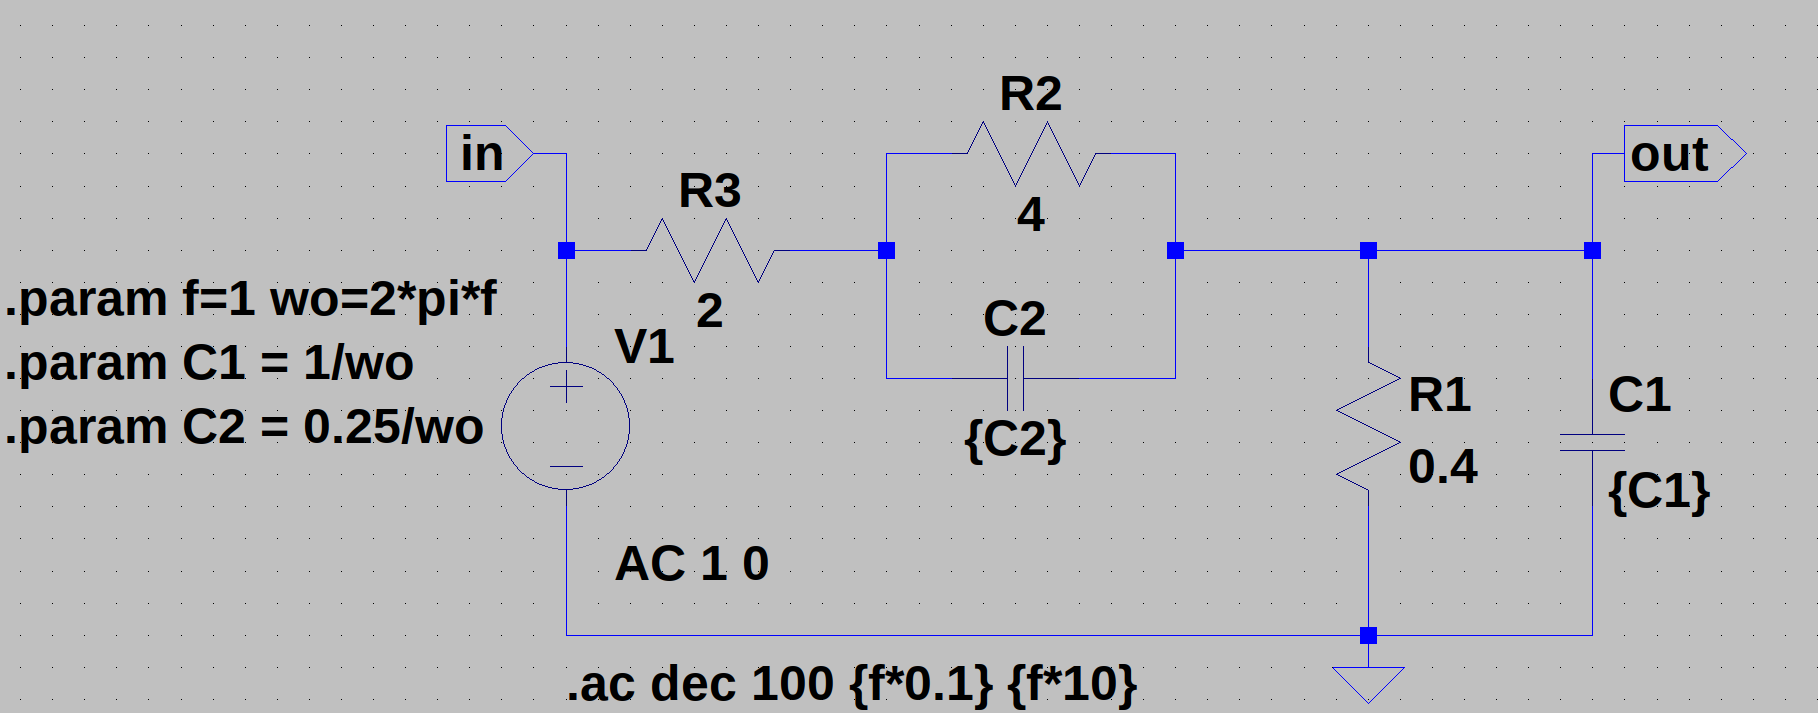

Y abajo respectivamente las transferencias de cada uno.

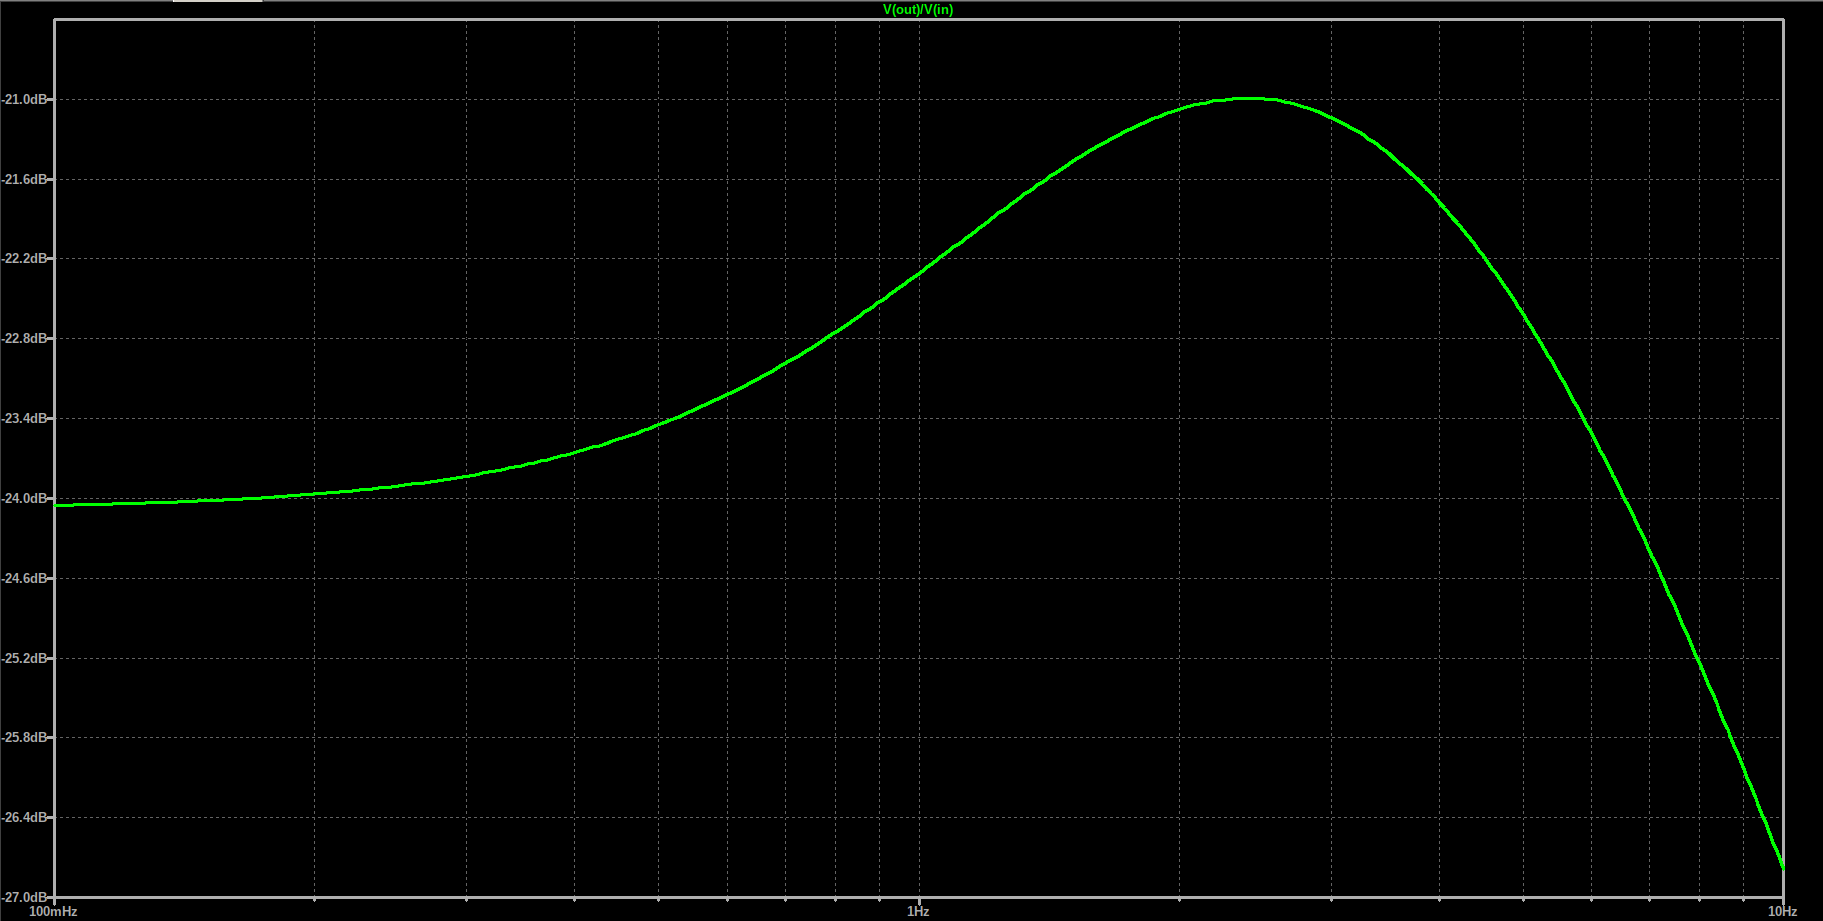

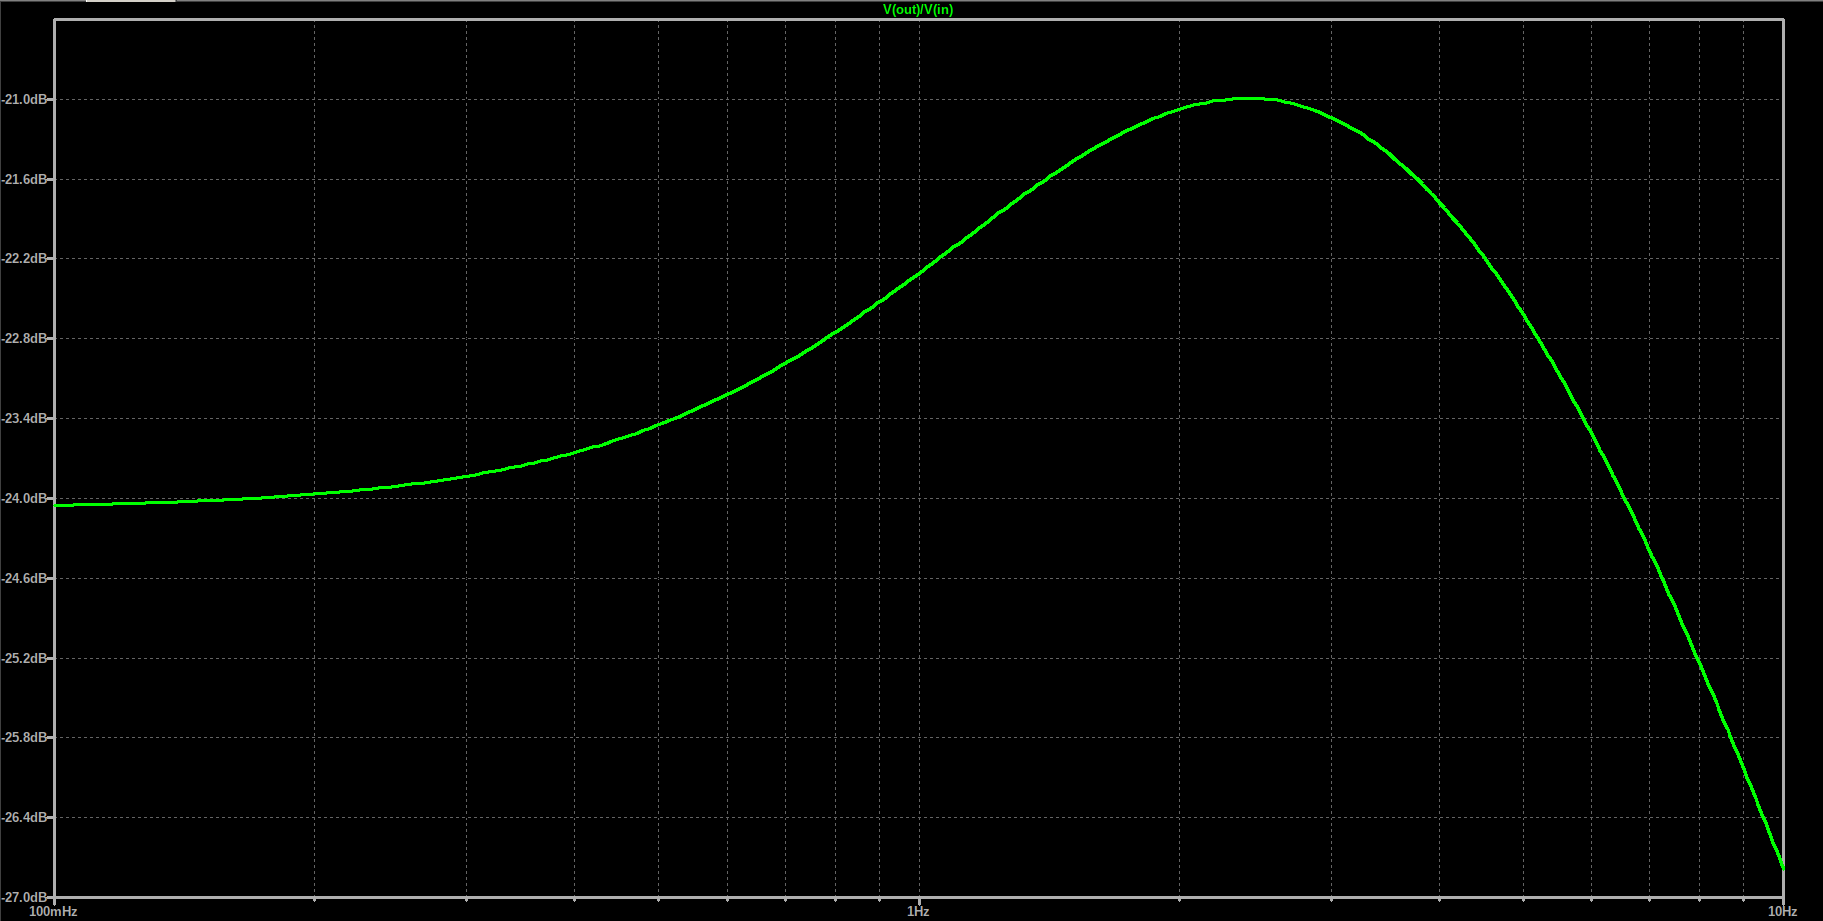